Tarea 3 - pregunta 2

¿Qué condiciones del hogar están asociadas con mejores o peores resultados en las pruebas Saber 11 en Cundinamarca y cómo pueden estos hallazgos contribuir a la reducción de brechas educativas? 

### Limpieza y extracción

In [42]:
#librerias necesarias para exploración y limpieza

import numpy as np
import pandas as pd 

#subir archivo con los datos
df = pd.read_csv("Datos_Cundinamarca.csv")
df.head()

,PERIODO,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_GENERO,COLE_JORNADA,COLE_MCPIO_UBICACION,ESTU_FECHANACIMIENTO,ESTU_GENERO,ESTU_PAIS_RESIDE,FAMI_CUARTOSHOGAR,...,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,DESEMP_INGLES,PUNT_INGLES,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_LECTURA_CRITICA,PUNT_GLOBAL
0,20224,URBANO,N,MIXTO,UNICA,GRANADA,03/09/2004,F,COLOMBIA,Dos,...,No,No,No,A-,42.0,26.0,45.0,42.0,43.0,196.0
1,20224,URBANO,N,MIXTO,SABATINA,CHOACHÍ,10/02/2005,M,COLOMBIA,Tres,...,Si,Si,Si,A-,40.0,60.0,46.0,54.0,50.0,258.0
2,20224,URBANO,NaN,MIXTO,COMPLETA,SOACHA,27/12/2004,M,COLOMBIA,NaN,...,NaN,Si,NaN,A1,54.0,61.0,58.0,55.0,55.0,285.0
3,20224,URBANO,N,MIXTO,COMPLETA,SOACHA,25/06/2006,F,COLOMBIA,Tres,...,Si,Si,Si,A2,62.0,54.0,64.0,63.0,60.0,302.0
4,20224,RURAL,N,MIXTO,SABATINA,SASAIMA,18/05/2006,M,COLOMBIA,Dos,...,No,Si,Si,A1,54.0,45.0,46.0,48.0,52.0,241.0


In [43]:
#valores faltantes en todas las columnas
df.isna().sum()

PERIODO                          0
COLE_AREA_UBICACION            198
COLE_BILINGUE                77355
COLE_GENERO                      0
COLE_JORNADA                     0
COLE_MCPIO_UBICACION             0
ESTU_FECHANACIMIENTO             0
ESTU_GENERO                    265
ESTU_PAIS_RESIDE                 0
FAMI_CUARTOSHOGAR             6558
FAMI_EDUCACIONMADRE          10699
FAMI_EDUCACIONPADRE          10753
FAMI_ESTRATOVIVIENDA         11609
FAMI_PERSONASHOGAR            6620
FAMI_TIENEAUTOMOVIL           6736
FAMI_TIENECOMPUTADOR          7473
FAMI_TIENEINTERNET            9766
FAMI_TIENELAVADORA            6420
DESEMP_INGLES                   71
PUNT_INGLES                     28
PUNT_MATEMATICAS                 0
PUNT_SOCIALES_CIUDADANAS    171841
PUNT_C_NATURALES            171841
PUNT_LECTURA_CRITICA        171841
PUNT_GLOBAL                 171841
dtype: int64

In [44]:
#voy a quedarme solo con las columnas que me sirven para responder mi pregunta 

columnas_interes = [
    "PUNT_GLOBAL",
    "PUNT_MATEMATICAS",
    "PUNT_LECTURA_CRITICA",
    "PUNT_C_NATURALES",
    "PUNT_SOCIALES_CIUDADANAS",
    "PUNT_INGLES",
    "FAMI_TIENECOMPUTADOR",
    "FAMI_TIENEINTERNET",
    "FAMI_TIENEAUTOMOVIL",
    "FAMI_TIENELAVADORA",
    "FAMI_ESTRATOVIVIENDA",
    "FAMI_PERSONASHOGAR",    
    "FAMI_CUARTOSHOGAR",       
]

df = df[columnas_interes]

#verificando que este bien
df


,PUNT_GLOBAL,PUNT_MATEMATICAS,PUNT_LECTURA_CRITICA,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENEAUTOMOVIL,FAMI_TIENELAVADORA,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR
0,196.0,26.0,43.0,42.0,45.0,42.0,No,No,No,No,Estrato 1,5 a 6,Dos
1,258.0,60.0,50.0,54.0,46.0,40.0,Si,Si,No,Si,Estrato 1,3 a 4,Tres
2,285.0,61.0,55.0,55.0,58.0,54.0,NaN,Si,NaN,NaN,Estrato 2,NaN,NaN
3,302.0,54.0,60.0,63.0,64.0,62.0,Si,Si,No,Si,Estrato 2,3 a 4,Tres
4,241.0,45.0,52.0,48.0,46.0,54.0,No,Si,No,Si,Estrato 2,1 a 2,Dos
...,...,...,...,...,...,...,...,...,...,...,...,...,...
470813,325.0,77.0,58.0,61.0,66.0,59.0,No,No,No,No,Estrato 1,Cuatro,Dos
470814,191.0,36.0,40.0,42.0,33.0,43.0,Si,No,No,Si,Estrato 2,5 a 6,Cinco
470815,220.0,50.0,57.0,35.0,37.0,34.0,Si,No,Si,Si,Estrato 2,5 a 6,Seis o mas
470816,220.0,50.0,57.0,35.0,37.0,34.0,Si,No,Si,Si,Estrato 2,5 a 6,Seis o mas


In [45]:
#hay demasiados valores vacios para el puntaje global, no los voy a tener en cuenta 
df = df.dropna(subset=["PUNT_GLOBAL"])

#vuelvo a revisar 
print(df.isna().sum())

#revisar cuantos estudiantes me quedaron despues de quitar el puntaje global 
df.shape

df

PUNT_GLOBAL                    0
PUNT_MATEMATICAS               0
PUNT_LECTURA_CRITICA           0
PUNT_C_NATURALES               0
PUNT_SOCIALES_CIUDADANAS       0
PUNT_INGLES                   28
FAMI_TIENECOMPUTADOR        4663
FAMI_TIENEINTERNET          7935
FAMI_TIENEAUTOMOVIL         4925
FAMI_TIENELAVADORA          4609
FAMI_ESTRATOVIVIENDA        8611
FAMI_PERSONASHOGAR          4808
FAMI_CUARTOSHOGAR           4778
dtype: int64


,PUNT_GLOBAL,PUNT_MATEMATICAS,PUNT_LECTURA_CRITICA,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENEAUTOMOVIL,FAMI_TIENELAVADORA,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR
0,196.0,26.0,43.0,42.0,45.0,42.0,No,No,No,No,Estrato 1,5 a 6,Dos
1,258.0,60.0,50.0,54.0,46.0,40.0,Si,Si,No,Si,Estrato 1,3 a 4,Tres
2,285.0,61.0,55.0,55.0,58.0,54.0,NaN,Si,NaN,NaN,Estrato 2,NaN,NaN
3,302.0,54.0,60.0,63.0,64.0,62.0,Si,Si,No,Si,Estrato 2,3 a 4,Tres
4,241.0,45.0,52.0,48.0,46.0,54.0,No,Si,No,Si,Estrato 2,1 a 2,Dos
...,...,...,...,...,...,...,...,...,...,...,...,...,...
470812,218.0,42.0,47.0,45.0,41.0,41.0,Si,No,No,Si,Estrato 1,Ocho,Cuatro
470813,325.0,77.0,58.0,61.0,66.0,59.0,No,No,No,No,Estrato 1,Cuatro,Dos
470814,191.0,36.0,40.0,42.0,33.0,43.0,Si,No,No,Si,Estrato 2,5 a 6,Cinco
470815,220.0,50.0,57.0,35.0,37.0,34.0,Si,No,Si,Si,Estrato 2,5 a 6,Seis o mas


In [46]:
#variables tecnologicas 
df_brechadigital= df.dropna(subset=["FAMI_TIENEINTERNET", "FAMI_TIENECOMPUTADOR"])

#verificar que si haya eliminado esto
print(df_brechadigital.isna().sum())

PUNT_GLOBAL                    0
PUNT_MATEMATICAS               0
PUNT_LECTURA_CRITICA           0
PUNT_C_NATURALES               0
PUNT_SOCIALES_CIUDADANAS       0
PUNT_INGLES                   25
FAMI_TIENECOMPUTADOR           0
FAMI_TIENEINTERNET             0
FAMI_TIENEAUTOMOVIL          402
FAMI_TIENELAVADORA           173
FAMI_ESTRATOVIVIENDA        1104
FAMI_PERSONASHOGAR           633
FAMI_CUARTOSHOGAR            554
dtype: int64


esto si tiene datos del numero de personas que tienen internet y computador

In [47]:
#verificando las variables categorica
df["FAMI_PERSONASHOGAR"] = pd.to_numeric(df["FAMI_PERSONASHOGAR"], errors="coerce")
df["FAMI_CUARTOSHOGAR"] = pd.to_numeric(df["FAMI_CUARTOSHOGAR"], errors="coerce")

#quitando los nulos porque no puedo trabajar con eso
df_hacinamiento = df.dropna(subset=["FAMI_PERSONASHOGAR","FAMI_CUARTOSHOGAR"])

#creando la nueva columna de hacimiento (#personas por cuarto)
df_hacinamiento = df.dropna(subset=["FAMI_PERSONASHOGAR","FAMI_CUARTOSHOGAR"])

df_hacinamiento["PERSONAS_POR_CUARTO"] = (
    df_hacinamiento["FAMI_PERSONASHOGAR"] /
    df_hacinamiento["FAMI_CUARTOSHOGAR"]
)

df_hacinamiento

#verificar 
print(df_hacinamiento.isna().sum())

PUNT_GLOBAL                 0
PUNT_MATEMATICAS            0
PUNT_LECTURA_CRITICA        0
PUNT_C_NATURALES            0
PUNT_SOCIALES_CIUDADANAS    0
PUNT_INGLES                 0
FAMI_TIENECOMPUTADOR        0
FAMI_TIENEINTERNET          0
FAMI_TIENEAUTOMOVIL         0
FAMI_TIENELAVADORA          0
FAMI_ESTRATOVIVIENDA        0
FAMI_PERSONASHOGAR          0
FAMI_CUARTOSHOGAR           0
PERSONAS_POR_CUARTO         0
dtype: int64


parece que despues de conservar las personas con puntaje global, estas personas no reportaron cuantas personas hay en el hogar ni cuantos cuartos hay en el hogar. No la puedo usar por falta de disponibilidad de datos. 

In [48]:

#asegurarme de que las variables deben ser numericas
cols_numericas = [
    "PUNT_GLOBAL","PUNT_MATEMATICAS","PUNT_LECTURA_CRITICA",
    "PUNT_C_NATURALES","PUNT_SOCIALES_CIUDADANAS","PUNT_INGLES",
    "FAMI_PERSONASHOGAR","FAMI_CUARTOSHOGAR"
]

for col in cols_numericas:
    df[col] = pd.to_numeric(df[col], errors="coerce")


In [49]:
#eliminamos las columnas de cuartos y personas en el hogar puesto que no tienen valores

columnas_interes = [
    "PUNT_GLOBAL",
    "PUNT_MATEMATICAS",
    "PUNT_LECTURA_CRITICA",
    "PUNT_C_NATURALES",
    "PUNT_SOCIALES_CIUDADANAS",
    "PUNT_INGLES",
    "FAMI_TIENECOMPUTADOR",
    "FAMI_TIENEINTERNET",
    "FAMI_TIENEAUTOMOVIL",
    "FAMI_TIENELAVADORA",
    "FAMI_ESTRATOVIVIENDA"
]

df = df[columnas_interes]

#nos aseguramos de quitar las filas vacias de los siguientes valores 
df_estrato = df.dropna(subset=["FAMI_ESTRATOVIVIENDA"])
df_brechadigital = df.dropna(subset=["FAMI_TIENEINTERNET","FAMI_TIENECOMPUTADOR"])
df_bienes = df.dropna(subset=["FAMI_TIENEAUTOMOVIL","FAMI_TIENELAVADORA"])


In [50]:
#verficiando que más hace falta por revisar
df_bienes.isna().sum()

PUNT_GLOBAL                    0
PUNT_MATEMATICAS               0
PUNT_LECTURA_CRITICA           0
PUNT_C_NATURALES               0
PUNT_SOCIALES_CIUDADANAS       0
PUNT_INGLES                   25
FAMI_TIENECOMPUTADOR         193
FAMI_TIENEINTERNET          5142
FAMI_TIENEAUTOMOVIL            0
FAMI_TIENELAVADORA             0
FAMI_ESTRATOVIVIENDA        5881
dtype: int64

In [51]:
df_estrato.isna().sum()

PUNT_GLOBAL                    0
PUNT_MATEMATICAS               0
PUNT_LECTURA_CRITICA           0
PUNT_C_NATURALES               0
PUNT_SOCIALES_CIUDADANAS       0
PUNT_INGLES                   23
FAMI_TIENECOMPUTADOR        2025
FAMI_TIENEINTERNET           463
FAMI_TIENEAUTOMOVIL         2228
FAMI_TIENELAVADORA          1963
FAMI_ESTRATOVIVIENDA           0
dtype: int64

In [52]:
df_brechadigital.isna().sum()  

PUNT_GLOBAL                    0
PUNT_MATEMATICAS               0
PUNT_LECTURA_CRITICA           0
PUNT_C_NATURALES               0
PUNT_SOCIALES_CIUDADANAS       0
PUNT_INGLES                   25
FAMI_TIENECOMPUTADOR           0
FAMI_TIENEINTERNET             0
FAMI_TIENEAUTOMOVIL          402
FAMI_TIENELAVADORA           173
FAMI_ESTRATOVIVIENDA        1104
dtype: int64

tendremos que trabajar por dataframes para cada medida que queremos trabajar. Se da por terminada la limpieza de estos datos en especifico. Entonces, tendremos diferentes dataframes para cada una de las necesidades que se deban evaluar.  

### Analisis de datos

Análisis general del Puntaje Global 

In [53]:
#quitar los nulos
df = df.dropna(subset=["PUNT_GLOBAL"])

#estadisticas descriptivas
df["PUNT_GLOBAL"].describe()

count    298977.000000
mean        260.884961
std          47.061333
min          17.000000
25%         227.000000
50%         259.000000
75%         293.000000
max         483.000000
Name: PUNT_GLOBAL, dtype: float64

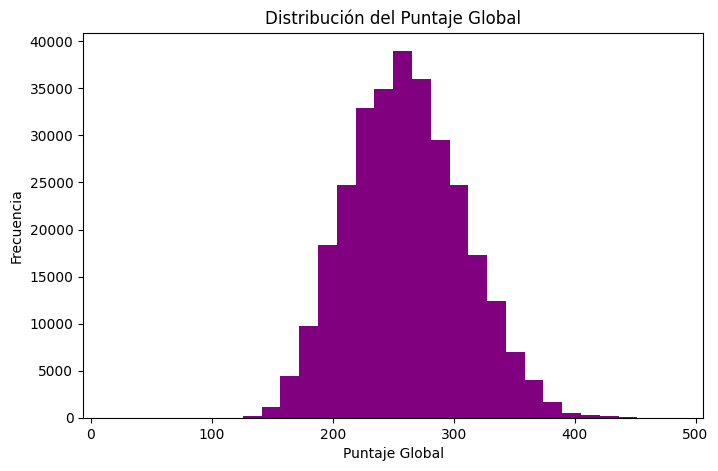

In [54]:
#histograma de la distribución del puntaje global 
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df["PUNT_GLOBAL"], bins=30, color="purple")
plt.title("Distribución del Puntaje Global")
plt.xlabel("Puntaje Global")
plt.ylabel("Frecuencia")
plt.show()

Estrato vs puntaje 

In [55]:
#agrupar el estrato por el puntaje global 
df_estrato.groupby("FAMI_ESTRATOVIVIENDA")["PUNT_GLOBAL"].mean()

FAMI_ESTRATOVIVIENDA
Estrato 1      243.823301
Estrato 2      258.650779
Estrato 3      271.669006
Estrato 4      293.365485
Estrato 5      305.173778
Estrato 6      312.861218
Sin Estrato    237.589650
Name: PUNT_GLOBAL, dtype: float64

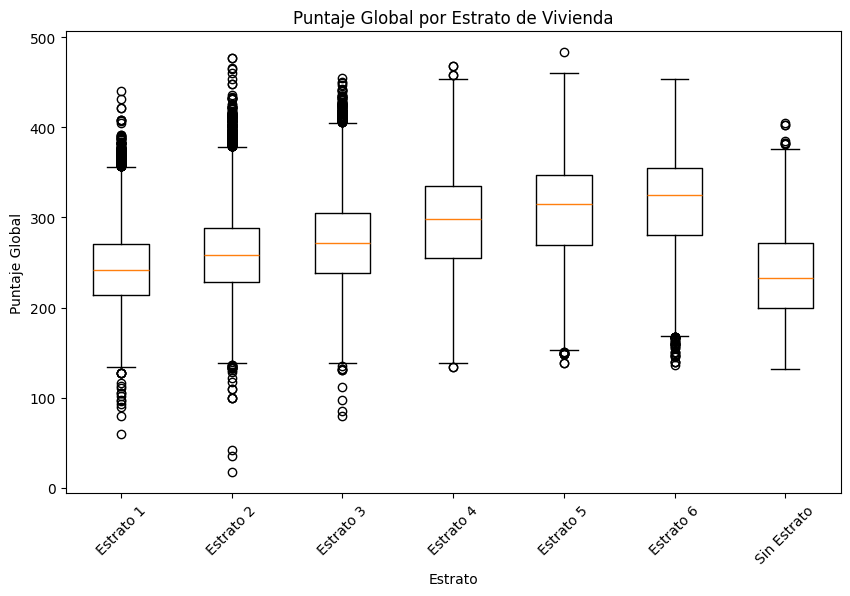

In [56]:
#asegurandonos de que no hayan nulos en el estrato
df_estrato = df.dropna(subset=["FAMI_ESTRATOVIVIENDA"])

#categorias ordenadas 
estratos = sorted(df_estrato["FAMI_ESTRATOVIVIENDA"].unique())

#lista de los puntajes en las categorias 
datos = [
    df_estrato[df_estrato["FAMI_ESTRATOVIVIENDA"] == e]["PUNT_GLOBAL"]
    for e in estratos
]

#graficar
plt.figure(figsize=(10,6))
plt.boxplot(datos)

#etiquetas y titulos 
plt.xticks(range(1, len(estratos)+1), estratos, rotation=45, color="black")
plt.title("Puntaje Global por Estrato de Vivienda")
plt.xlabel("Estrato")
plt.ylabel("Puntaje Global")

plt.show()

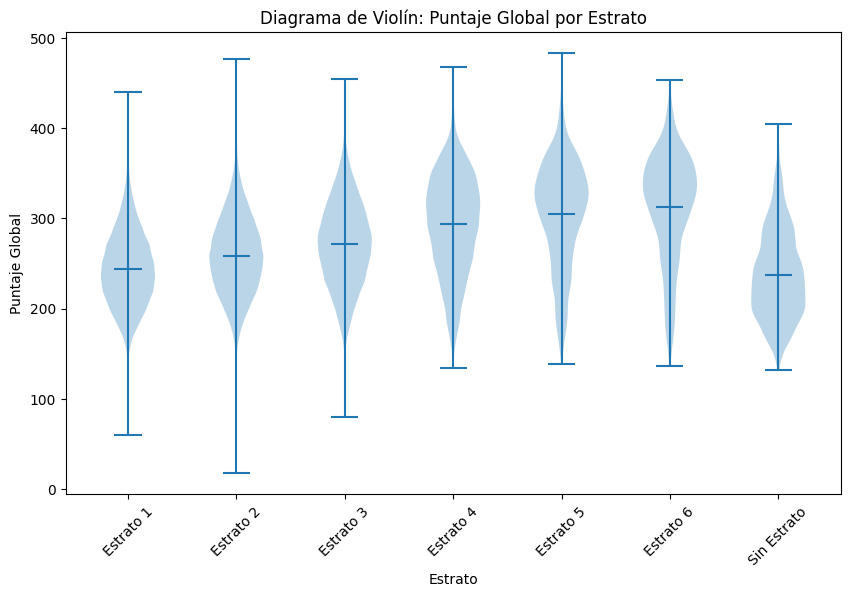

In [57]:
# Crear gráfico
plt.figure(figsize=(10,6))
plt.violinplot(datos, showmeans=True)

plt.xticks(range(1, len(estratos)+1), estratos, rotation=45)
plt.title("Diagrama de Violín: Puntaje Global por Estrato")
plt.xlabel("Estrato")
plt.ylabel("Puntaje Global")

plt.show()

Brecha digital vs Puntaje global 

In [ ]:
#agrupar para ver la media
df_tecnologia.groupby("FAMI_TIENEINTERNET")["PUNT_GLOBAL"].mean()
df_tecnologia.groupby("FAMI_TIENECOMPUTADOR")["PUNT_GLOBAL"].mean()

FAMI_TIENECOMPUTADOR
No    244.038605
Si    269.641446
Name: PUNT_GLOBAL, dtype: float64

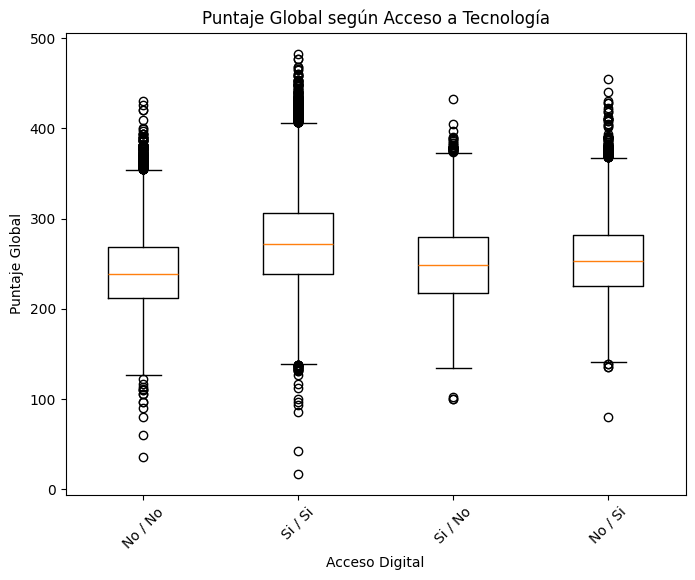

In [ ]:
df_tecnologia = df.dropna(subset=["FAMI_TIENEINTERNET","FAMI_TIENECOMPUTADOR"])

df_tecnologia["BRECHA_DIGITAL"] = (
    df_tecnologia["FAMI_TIENEINTERNET"] + " / " +
    df_tecnologia["FAMI_TIENECOMPUTADOR"]
)

import matplotlib.pyplot as plt

categorias = df_tecnologia["BRECHA_DIGITAL"].unique()

datos = [
    df_tecnologia[df_tecnologia["BRECHA_DIGITAL"] == c]["PUNT_GLOBAL"]
    for c in categorias
]

plt.figure(figsize=(8,6))
plt.boxplot(datos)

plt.xticks(range(1, len(categorias)+1), categorias, rotation=45)
plt.title("Puntaje Global según Acceso a Tecnología")
plt.xlabel("Acceso Digital")
plt.ylabel("Puntaje Global")

plt.show()